In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# loading the cleaned dataset - saved from initial_eda_cleaning.ipynb
df = pd.read_csv('clean_spotify.csv')

,Metric,Score
0,Mean Squared Error (MSE),342.446798
1,R-squared (R2),0.306059


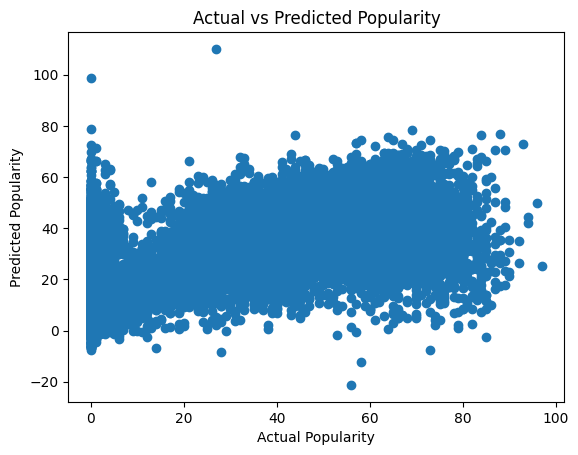

In [3]:
# polynomial regression model - first attempt

# splitting the data into target & features
feature_cols = df.columns.tolist()
feature_cols.remove('popularity')
X = df[feature_cols]
y = df['popularity']

# splitting the data into train / target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# feature transformation
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# model training
model = LinearRegression()
model.fit(X_train_poly, y_train)

# prediction making
y_pred = model.predict(X_test_poly)

# calculating model evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# model evaluation metrics table
evaluation_metrics = {'Metric': ['Mean Squared Error (MSE)', 'R-squared (R2)'],
                      'Score': [mse, r2]}
metrics_df = pd.DataFrame(evaluation_metrics)
display(metrics_df)

# scatterplot as visualization\
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Popularity")
plt.ylabel("Predicted Popularity")
plt.title("Actual vs Predicted Popularity")
plt.show()

In [ ]:
# polynomial regression model - second attempt: increasing degree of poly_features -- did not work :(, laptop could not handle it

# splitting the data into target & features
feature_cols = df.columns.tolist()
feature_cols.remove('popularity')
X = df[feature_cols]
y = df['popularity']

# splitting the data into train / target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# feature transformation
poly_features = PolynomialFeatures(degree=3)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# model training
model = LinearRegression()
model.fit(X_train_poly, y_train)

# prediction making
y_pred = model.predict(X_test_poly)

# calculating model evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# model evaluation metrics table
evaluation_metrics = {'Metric': ['Mean Squared Error (MSE)', 'R-squared (R2)'],
                      'Score': [mse, r2]}
metrics_df = pd.DataFrame(evaluation_metrics)
display(metrics_df)

# scatterplot as visualization\
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Popularity")
plt.ylabel("Predicted Popularity")
plt.title("Actual vs Predicted Popularity")
plt.show()

,Metric,Score
0,Mean Squared Error (MSE),341.993954
1,R-squared (R2),0.306976


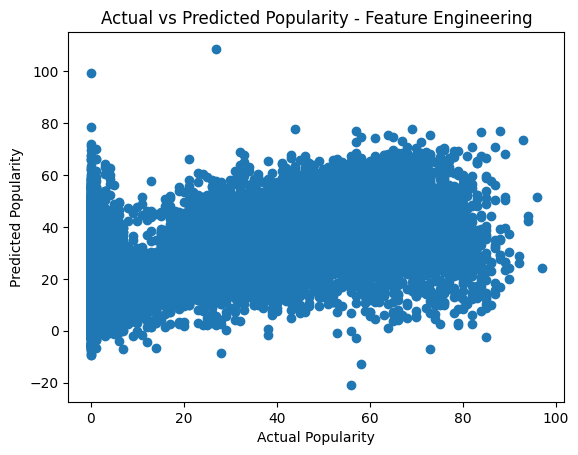

In [5]:
# third attempt -- added a vibrancy interaction term
df['energy_danceability_interaction'] = df['energy'] * df['danceability']

# splitting the data into target & features
feature_cols = df.columns.tolist()
feature_cols.remove('popularity')
X = df[feature_cols]
y = df['popularity']

# splitting the data into train / target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# feature transformation
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# model training
model = LinearRegression()
model.fit(X_train_poly, y_train)

# prediction making
y_pred = model.predict(X_test_poly)

# calculating model evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# model evaluation metrics table
evaluation_metrics = {'Metric': ['Mean Squared Error (MSE)', 'R-squared (R2)'],
                      'Score': [mse, r2]}
metrics_df = pd.DataFrame(evaluation_metrics)
display(metrics_df)

# scatterplot as visualization\
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Popularity")
plt.ylabel("Predicted Popularity")
plt.title("Actual vs Predicted Popularity - Feature Engineering")
plt.show()


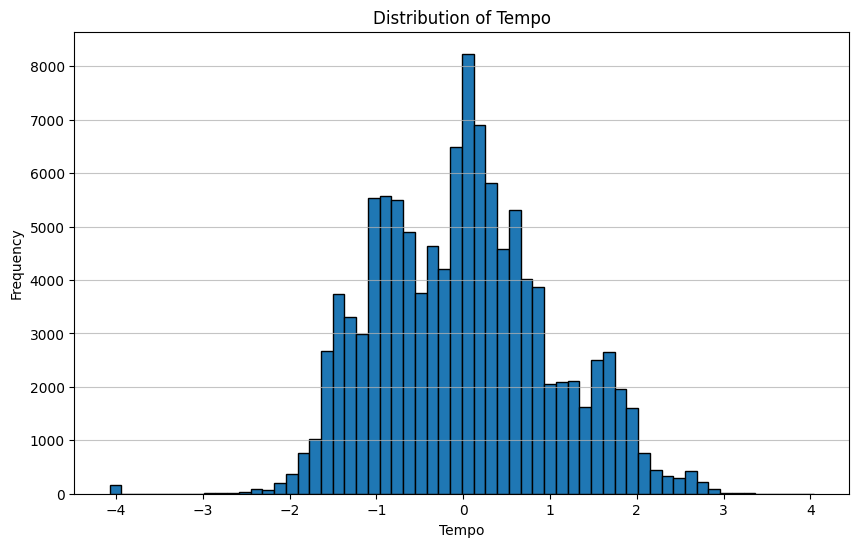

In [7]:
# histogramming tempo feature to determine bin edges

plt.figure(figsize=(10, 6))
plt.hist(df['tempo'], bins=60, edgecolor='black')
plt.xlabel('Tempo')
plt.ylabel('Frequency')
plt.title('Distribution of Tempo')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [33]:
# binning tempo based on above histogram

# bin edges based on histogram
tempo_bins = [df['tempo'].min(), -2, -1, 0, 1, 2, df['tempo'].max()]

# defining bin labels
tempo_labels = ['Class_1', 'Class_2', 'Class_3', 'Class_4', 'Class_5', 'Class_6']

# actually binning
df['tempo_binned_custom'] = pd.cut(df['tempo'], bins=tempo_bins, labels=tempo_labels, right=True, include_lowest=True)

# Display the original tempo and the new binned feature
display(df[['tempo', 'tempo_binned_custom']].head())

# See the distribution of tracks in each custom bin
display(df['tempo_binned_custom'].value_counts())

# removing old tempo feature
df = df.drop('tempo', axis=1)

,tempo,tempo_binned_custom
0,-1.141863,Class_2
1,-1.489717,Class_2
2,-1.528312,Class_2
3,1.987859,Class_5
4,-0.073348,Class_3


tempo_binned_custom
Class_4    38618
Class_3    37890
Class_2    18882
Class_5    15244
Class_6     2682
Class_1      684
Name: count, dtype: int64

In [34]:
# encoding new binned feature
tempo_binned_onehot = pd.get_dummies(df['tempo_binned_custom'], prefix='tempo_binned')
df = pd.concat([df, tempo_binned_onehot], axis=1)
df = df.drop('tempo_binned_custom', axis=1)

# making sure all new columns are 0/1
tempo_onehot_cols = [col for col in df.columns if col.startswith('tempo_binned_')]

for col in tempo_onehot_cols:
    df[col] = df[col].astype(int)

df.head()

,popularity,duration_ms,explicit,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,...,track_genre_trance,track_genre_trip-hop,track_genre_turkish,track_genre_world-music,tempo_binned_Class_1,tempo_binned_Class_2,tempo_binned_Class_3,tempo_binned_Class_4,tempo_binned_Class_5,tempo_binned_Class_6
0,73,0.024575,0,0.629244,-0.717148,0.300828,0.551848,-0.850202,-0.504109,0.758743,...,0,0,0,0,0,1,0,0,0,0
1,55,-0.730859,0,-0.845908,-1.889980,-1.784744,-0.078993,1.831732,-0.504094,-0.591211,...,0,0,0,0,0,1,0,0,0,0
2,57,-0.160332,0,-0.742186,-1.122669,-0.293288,-0.273826,-0.315499,-0.504112,-0.507167,...,0,0,0,0,0,1,0,0,0,0
3,71,-0.243214,0,-1.733304,-2.312994,-2.039252,-0.457309,1.774593,-0.503883,-0.428376,...,0,0,0,0,0,0,0,0,1,0
4,82,-0.271919,0,0.295030,-0.788711,-0.282750,-0.303145,0.463399,-0.504112,-0.686285,...,0,0,0,0,0,0,1,0,0,0


,Metric,Score
0,Mean Squared Error (MSE),341.530497
1,R-squared (R2),0.307915


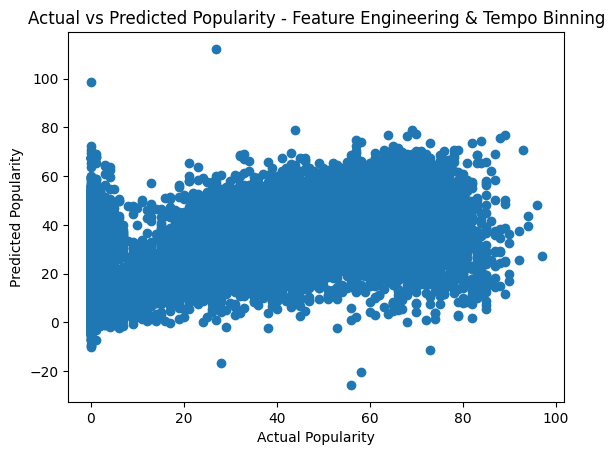

In [41]:
# fourth attempt - keeping engineered 'vibrancy' feature and binning tempo

# splitting the data into target & features
feature_cols = df.columns.tolist()
feature_cols.remove('popularity')
X = df[feature_cols]
y = df['popularity']

# splitting the data into train / target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# feature transformation
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# model training
model = LinearRegression()
model.fit(X_train_poly, y_train)

# prediction making
y_pred = model.predict(X_test_poly)

# calculating model evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# model evaluation metrics table
evaluation_metrics = {'Metric': ['Mean Squared Error (MSE)', 'R-squared (R2)'],
                      'Score': [mse, r2]}
metrics_df = pd.DataFrame(evaluation_metrics)
display(metrics_df)

# scatterplot as visualization
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Popularity")
plt.ylabel("Predicted Popularity")
plt.title("Actual vs Predicted Popularity - Feature Engineering & Tempo Binning")
plt.savefig("model_metrics_table.png", dpi=300)
plt.show()